In [2]:
# load some libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from scipy.special import sph_harm
from scipy.special import erf
import hf_routines as hf
import plotting as plt

In [3]:
# set STO-3G basis for zeta = 1.24
alpha = np.array([0.168856,0.623913,3.42525])
d = np.array([0.444635,0.535328,0.154329])
R = np.empty((2,3),dtype=float)
R[0,0] = R[0,1] = R[0,2] = 0.0
R[1,0] = 1.4
R[1,1] = R[1,2] = 0.0
basis_set = [hf.sto(3,alpha,d,R[i,:]) for i in range(2)]
atoms = [hf.atom(R[i,:],1.0) for i in range(2)]

In [4]:
basis_set[0].sto_ng(2.0)

0.064564933501494171

In [5]:
# setup scan
r = np.arange(0.5,10,0.1)
x = np.arange(-5,15,0.1)
density = np.empty((x.size,r.size),dtype=float)
n = r.size
energy = np.empty(n)

In [6]:
for i in range(n):
    basis_set[1].R[0] = r[i]
    atoms[1].pos[0] = r[i]
    S, Sinv = hf.overlap(basis_set)
    C = hf.optimal_C(S)
    T = hf.kinetic(basis_set)
    V = hf.core_potential(basis_set,atoms)
    Hcore = V + T
    twoE = hf.compute_twoE(basis_set)
    P = hf.constructDensityMat(C)
    G = hf.compute_G(P,twoE)
    F = Hcore + G
    energy[i] = hf.total_energy(F,Sinv,Hcore,P,atoms)

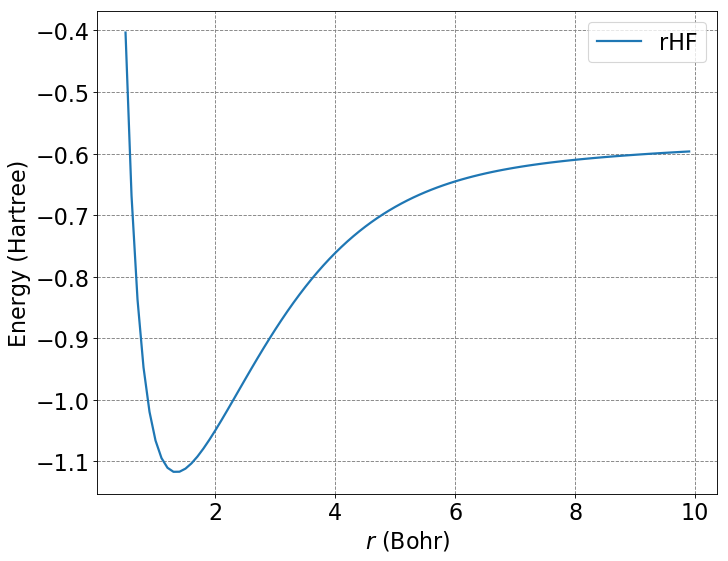

In [7]:
# plot results
ax = plt.define_figure(xlabel="$r$ (Bohr)",ylabel="Energy (Hartree)")
ax.plot(r,energy,lw=2,label='rHF')
ax.legend(fontsize=20)

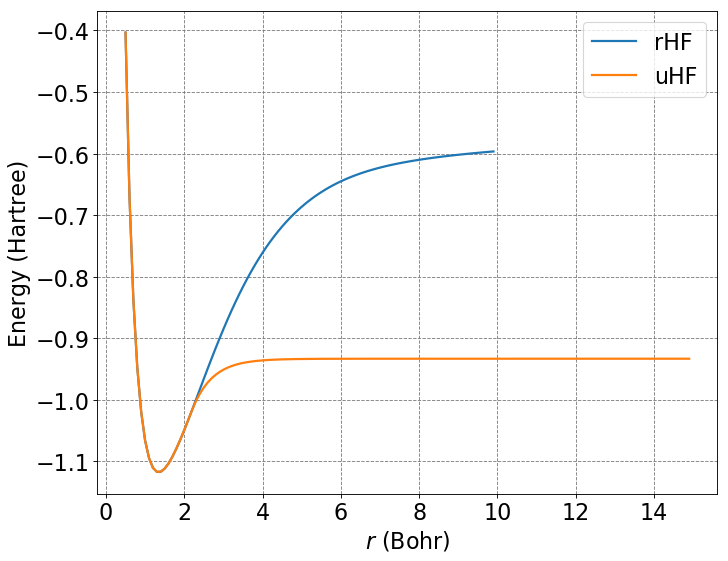

In [8]:
# plot results with UHF
ax = plt.define_figure(xlabel="$r$ (Bohr)",ylabel="Energy (Hartree)")
ax.plot(r,energy,lw=2,label='rHF')
uhf = np.loadtxt("uhf_energy_scan.txt")
ax.plot(uhf[:,0],uhf[:,1],lw=2,label='uHF')
ax.legend(fontsize=20)

In [9]:
h2_all = np.loadtxt("h2_try.txt",skiprows=1)

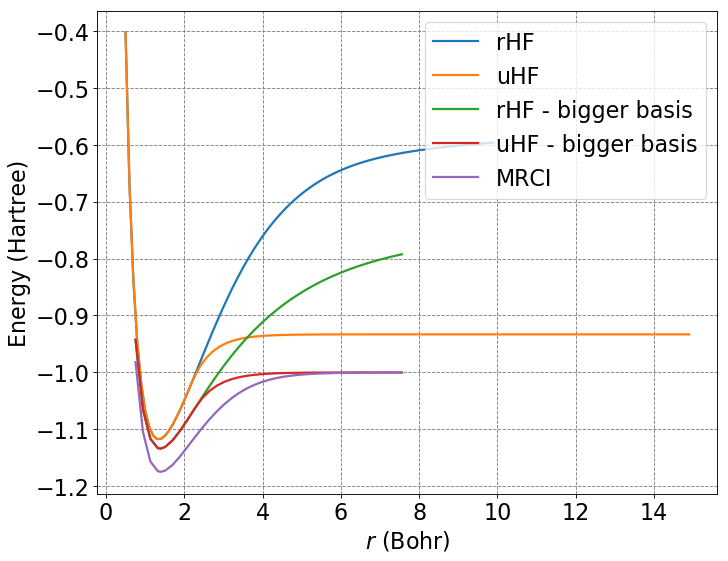

In [10]:
# plot results with UHF
ax = plt.define_figure(xlabel="$r$ (Bohr)",ylabel="Energy (Hartree)")
ax.plot(r,energy,lw=2,label='rHF')
uhf = np.loadtxt("uhf_energy_scan.txt")
ax.plot(uhf[:,0],uhf[:,1],lw=2,label='uHF')
ax.plot(h2_all[:,0]*1.88973,h2_all[:,1],lw=2,label='rHF - bigger basis')
ax.plot(h2_all[:,0]*1.88973,h2_all[:,2],lw=2,label='uHF - bigger basis')
ax.plot(h2_all[:,0]*1.88973,h2_all[:,6],lw=2,label='MRCI')
ax.legend(fontsize=20)

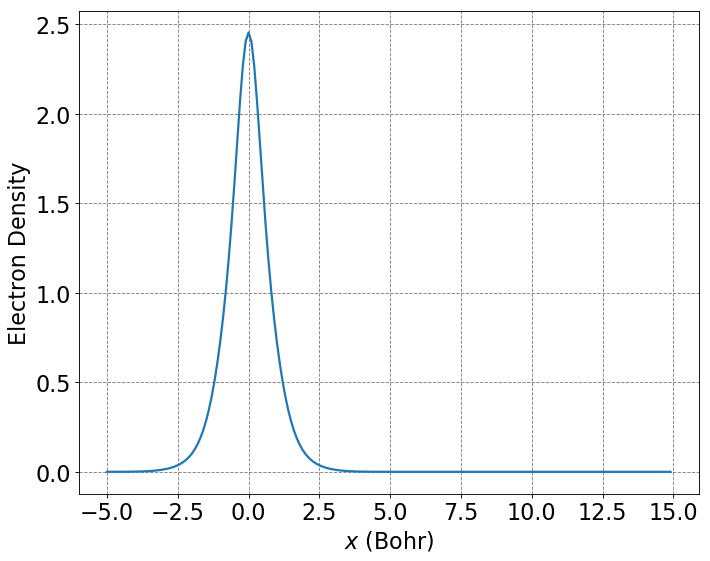

In [11]:
# plot densities
density = hf.compute_electron_density(basis_set,P,x)
ax = plt.define_figure(xlabel="$x$ (Bohr)",ylabel="Electron Density")
ax.plot(x,density,lw=2)